In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [39]:

amazon_df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [47]:
#freguncy table
category_frequency= amazon_df["category"].value_counts()
category_frequency

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [43]:
#top most listed products
category_frequency.head(5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

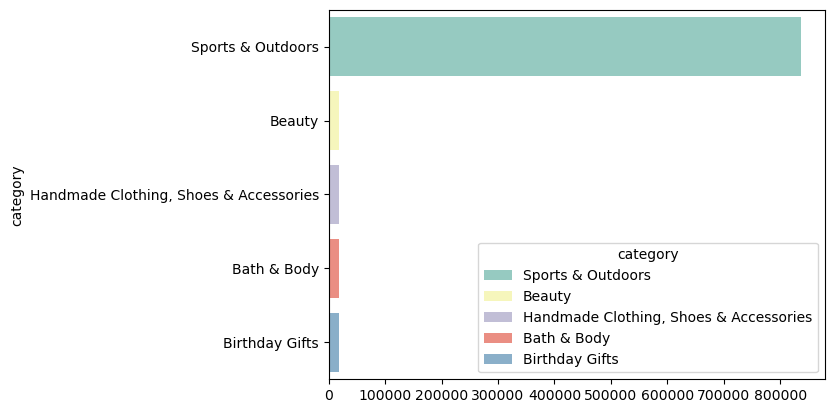

In [52]:
# 2.visulaization 
#2.1. distribution accross different cat using bar chart
top_categories=category_frequency.head(5)

ax=sns.barplot(y=top_categories.index, x=top_categories.values, palette="Set3", hue=top_categories.index, legend='full')

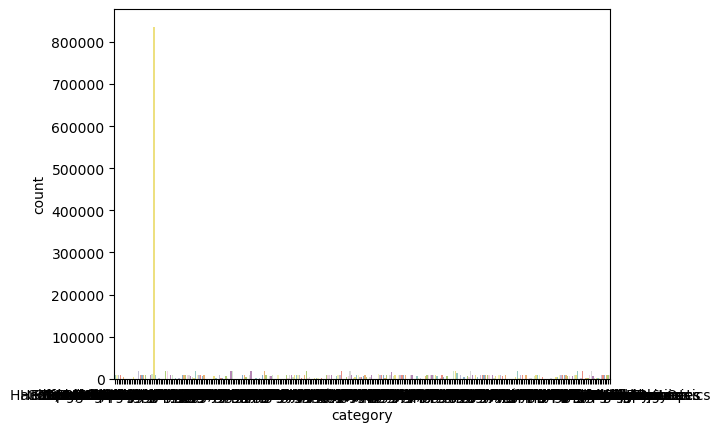

In [57]:
sns.countplot(data=amazon_df, x='category', palette="Set3", hue='category', legend=False);

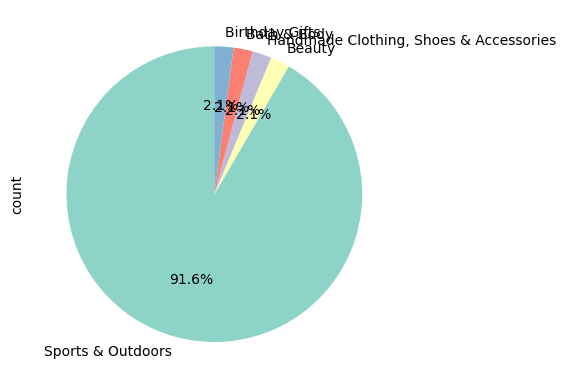

In [66]:
#2.2 for subset top categoriws, proposition pie chart
top_categories.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"), legend=False);

In [68]:
#part 2 Business questions
#1. measure of centrality(mean, median, mode of price),average price point
mean_price=amazon_df["price"].mean()
median_price=amazon_df["price"].median()
mode_price=amazon_df["price"].mode()[0]

mean_price, median_price, mode_price

(89.24380943923663, 19.09, 9.99)

In [71]:
#2measure of dispertion
std_price=amazon_df['price'].std()
var_price=amazon_df['price'].var()
range_price=amazon_df['price'].max() - amazon_df['price'].min()#difference between high and low 
iqr_price=amazon_df['price'].quantile(0.75) - amazon_df['price'].quantile(0.25)#middle 50%

std_price,var_price,range_price,iqr_price

(345.6088617535223, 119445.4853225653, 100000.0, 36.0)

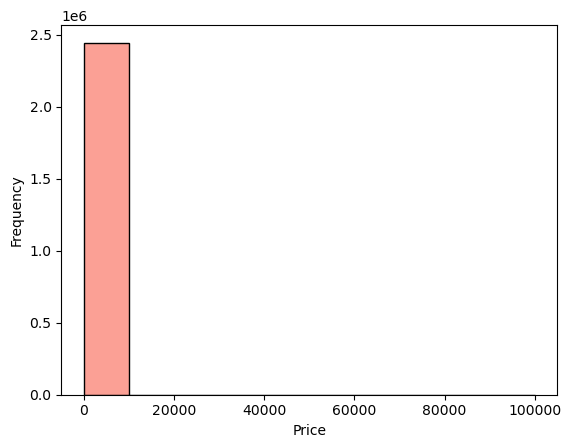

In [141]:
#visualisation
#histogram
sns.histplot(amazon_df['price'], bins=10, color="salmon");
plt.xlabel('Price');
plt.ylabel('Frequency');

<Axes: xlabel='price', ylabel='Count'>

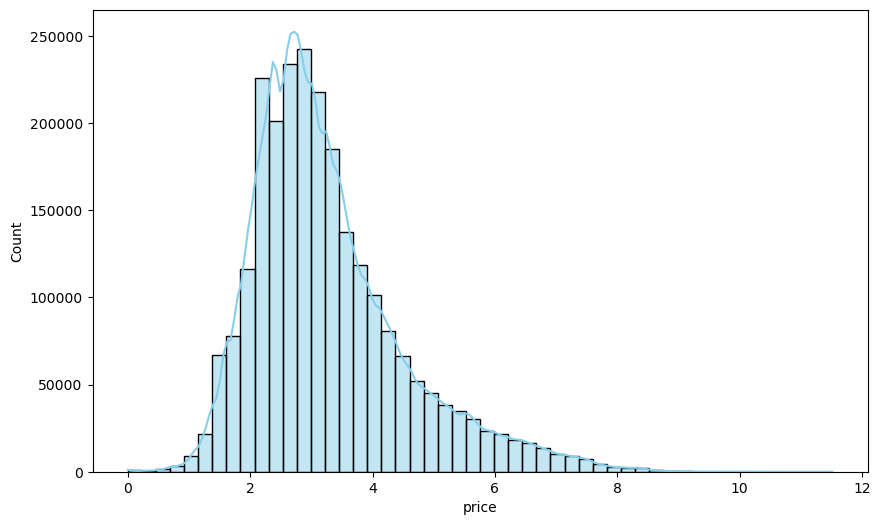

In [144]:
# If its hard to read these diagrams, think why this is, and explain how it could be solved..
#because the prices on x axis are higher
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(amazon_df['price']), bins=50, color='skyblue', kde=True)

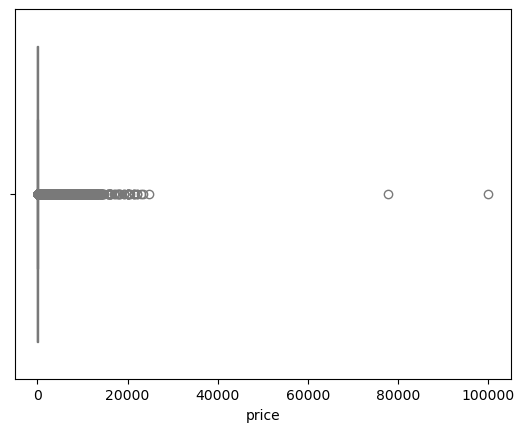

In [91]:
#boxplot
sns.boxplot(x = amazon_df['price'], color="lightblue");

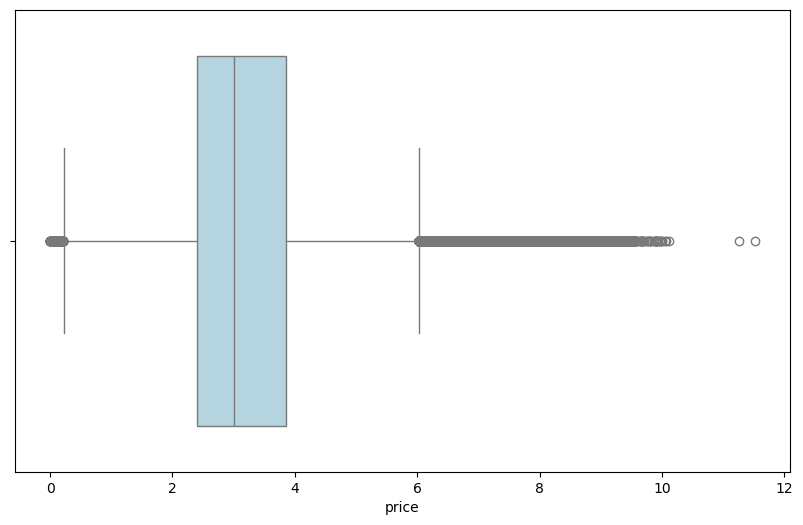

In [150]:
plt.figure(figsize=(10, 6))
sns.boxplot(x =np.log1p(amazon_df['price']), color="lightblue");

In [100]:
amazon_df.columns


Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [112]:
amazon_df["stars"].head()

0    4.7
1    4.7
2    4.7
3    4.7
4    4.6
Name: stars, dtype: float64

In [114]:
#part3
mean_rating= amazon_df["stars"].mean()
median_rating=amazon_df["stars"].median()
mode_rating=amazon_df["stars"].mode()[0]

mean_rating, median_rating, mode_rating

(2.152836472966065, 0.0, 0.0)

In [119]:
std_rating=amazon_df['stars'].std()
var_rating=amazon_df['stars'].var()
range_rating=amazon_df['stars'].max() - amazon_df['stars'].min()#difference between high and low 
iqr_rating=amazon_df['stars'].quantile([0.25, 0.5, 0.75])#spread of middle 50%

std_rating,var_rating,range_rating,iqr_rating

(2.1948653785054697,
 4.81743402976196,
 5.0,
 0.25    0.0
 0.50    0.0
 0.75    4.4
 Name: stars, dtype: float64)

In [137]:
#
skewness_stars = amazon_df['stars'].skew()#if psitive leann towards hiher values
kurtosis_stars = amazon_df['stars'].kurtosis()#high ratings have hevy tails

skewness_stars, kurtosis_stars

(0.08120735761080985, -1.9260061280432985)

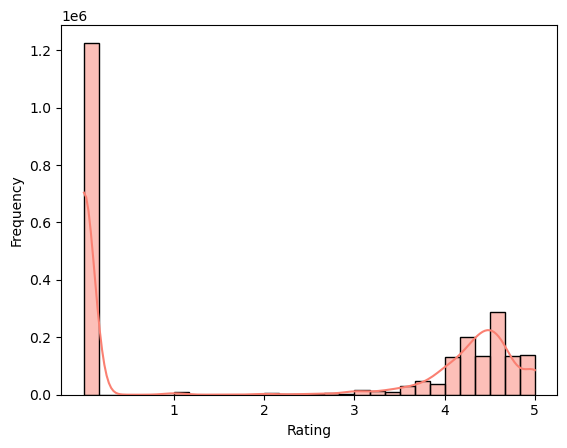

In [134]:
sns.histplot(amazon_df['stars'], kde=True, bins=30, color="salmon");
plt.xlabel("Rating");
plt.ylabel("Frequency");
plt.xticks([1, 2, 3, 4, 5]);

In [ ]:
#most are unrted by customer with 0, average is around 2.3, negative curtosis mean ratings are more evenly spreadd
#skeweness tail more towards right